In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv("tested.csv")

In [10]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
data.isnull().head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [32]:
data.dropna(subset=['Fare', 'Cabin'], inplace=True)

In [33]:
missing_values = data.isnull().sum()

In [34]:
print(missing_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [35]:
drop = data.dropna(inplace=True)

In [36]:
print(drop)

None


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 12 to 414
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Survived     87 non-null     int64  
 2   Pclass       87 non-null     int64  
 3   Name         87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Sex_female   87 non-null     bool   
 11  Sex_male     87 non-null     bool   
 12  Embarked_C   87 non-null     bool   
 13  Embarked_Q   87 non-null     bool   
 14  Embarked_S   87 non-null     bool   
dtypes: bool(5), float64(2), int64(5), object(3)
memory usage: 7.9+ KB


In [38]:
data.value_counts()

PassengerId  Survived  Pclass  Name                                           Age   SibSp  Parch  Ticket    Fare      Cabin    Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
904          1         1       Snyder, Mrs. John Pillsbury (Nelle Stevenson)  23.0  1      0      21228     82.2667   B45      True        False     False       False       True          1
1164         1         1       Clark, Mrs. Walter Miller (Virginia McDowell)  26.0  1      0      13508     136.7792  C89      True        False     True        False       False         1
1213         0         3       Krekorian, Mr. Neshan                          25.0  0      0      2654      7.2292    F E57    False       True      True        False       False         1
1208         0         1       Spencer, Mr. William Augustus                  57.0  1      0      PC 17569  146.5208  B78      False       True      True        False       False         1
1206         1         1       White, Mrs. John Stuart (Ella

In [39]:
data.count()

PassengerId    87
Survived       87
Pclass         87
Name           87
Age            87
SibSp          87
Parch          87
Ticket         87
Fare           87
Cabin          87
Sex_female     87
Sex_male       87
Embarked_C     87
Embarked_Q     87
Embarked_S     87
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [46]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf_classifier.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)

In [52]:
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [53]:
from sklearn.metrics import classification_report, accuracy_score

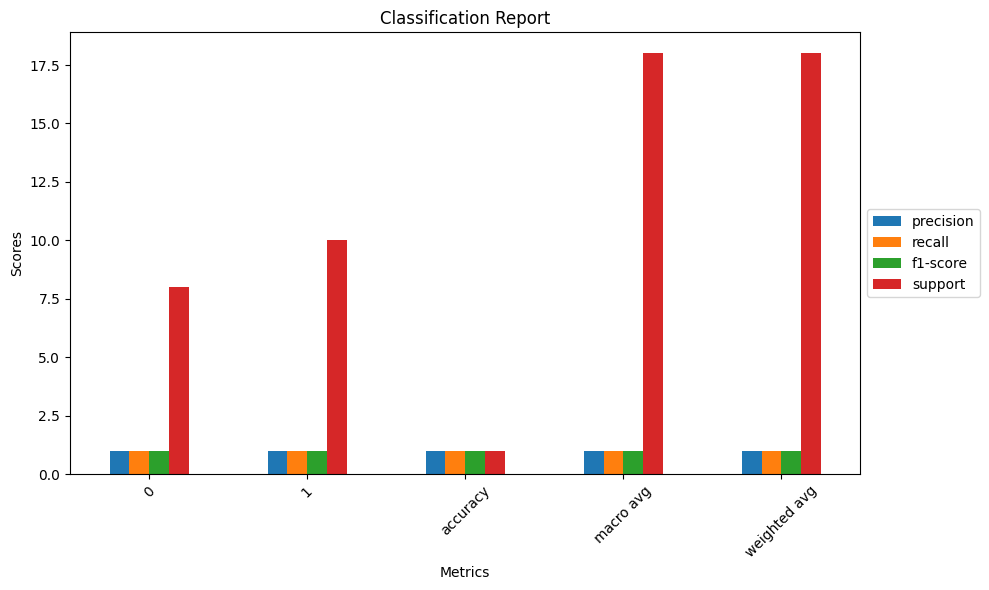

In [54]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report.plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()